In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics







In [4]:
#regression data
file="Documents/gold.xlsx"
gold_data=pd.read_excel(file)


In [7]:
gold_data.head(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
0,2008-02-01 00:00:00,1447.160034,84.860001,78.470001,15.180,1.471692
1,2008-03-01 00:00:00,1447.160034,85.570000,78.370003,15.285,1.474491
2,2008-04-01 00:00:00,1411.630005,85.129997,77.309998,15.167,1.475492
3,2008-07-01 00:00:00,1416.180054,84.769997,75.500000,15.053,1.468299
4,2008-08-01 00:00:00,1390.189941,86.779999,76.059998,15.590,1.557099


In [11]:
gold_data.tail(5)

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,2018-08-05 00:00:00,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,2018-09-05 00:00:00,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,2018-10-05 00:00:00,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [13]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [15]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [19]:
if 'Date' in gold_data.columns:
  gold_data['Date'] = pd.to_datetime(gold_data['Date'])
correlation=gold_data.corr()

<Axes: >

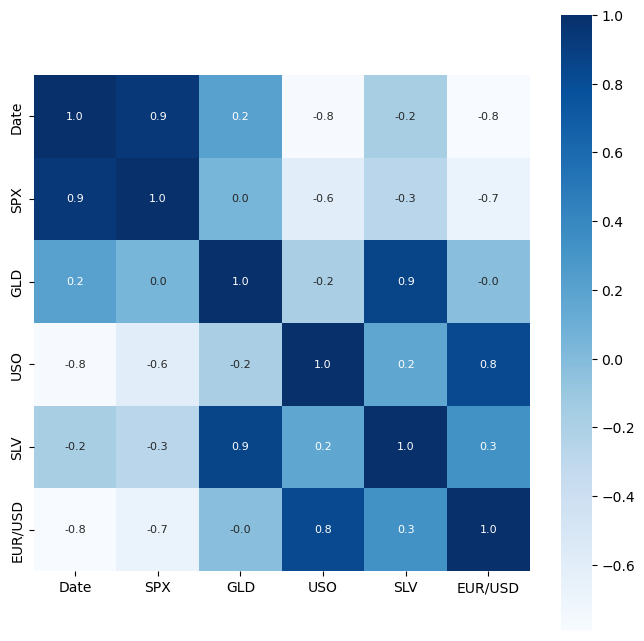

In [39]:
plt.figure(figsize=(8,8))
sns.heatmap(correlation, cbar=True ,square=True, fmt='.1f', annot=True, annot_kws={'size':8}, cmap='Blues')

In [41]:
print(correlation['GLD'])

Date       0.207614
SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


In [49]:
X=gold_data.drop(['Date','GLD'], axis=1)
Y=gold_data['GLD']

In [47]:
print(X)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]


In [51]:
print(Y)

0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [53]:
#splitting test and traning data
X_train, X_test,Y_train, Y_test=train_test_split(X,Y, test_size=0.2, random_state=2)

In [55]:
#model tranning
regressor=RandomForestRegressor(n_estimators=100)

In [57]:
regressor.fit(X_train, Y_train)

RandomForestRegressor()

In [59]:
#prediction on data
test_data_prediction= regressor.predict(X_test)

In [61]:
print(test_data_prediction)

[168.55839921  81.91399998 116.09149966 127.63450083 120.79750124
 154.72979795 150.31429831 126.34089997 117.54929884 125.91190099
 116.83540104 172.564001   141.35099876 167.61939843 115.14459995
 117.3820002  138.72040266 170.14900122 159.57510306 158.45619983
 155.13480016 125.53830016 176.33409951 156.99950349 125.17330022
  93.72589989  77.06870016 120.46940002 119.12349959 167.47529928
  88.2775007  125.36070013  91.32510104 117.69610005 121.04799941
 136.78380104 115.40780143 115.30220071 147.61820008 107.12050099
 104.23340276  87.20099788 126.5760005  117.99469991 153.5846999
 119.62889972 108.40999991 107.91619771  93.17100053 127.03269818
  75.15430052 113.64389934 121.30150023 111.35719934 118.99669907
 120.51329938 159.95880044 167.71430067 146.93299648  85.76459849
  94.54530053  86.78779865  90.62829972 118.94620103 126.43250073
 127.48830007 170.66129987 122.17329915 117.51859877  98.65359995
 168.3064008  143.22569785 132.49140265 121.27210216 121.3102993
 119.6521007

In [69]:
error_score=metrics.r2_score(Y_test,test_data_prediction)
print("r squared error", error_score)

r squared error 0.9888332579524678


In [71]:
Y_test=list(Y_test)

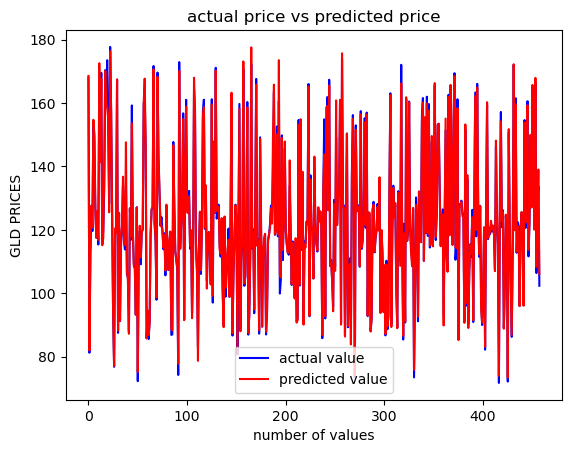

In [86]:
plt.plot(Y_test, color='blue', label='actual value')
plt.plot(test_data_prediction, color='red', label= 'predicted value')
plt.title('actual price vs predicted price')
plt.xlabel('number of values')
plt.ylabel('GLD PRICES')
plt.legend()
plt.show()